- ### Planteamiento del problema:

Crear un clasificador de reseñas de la tienda de Google Play..

In [1]:
# Se importa el dataset
import pandas as pd

url = 'https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv'
dataframe = pd.read_csv(url)

- ### Exploración y limpieza de datos:

In [2]:
# Primera apreciacion del dataset
filas = dataframe.shape[0]
columnas = dataframe.shape[1]
print(f'Filas: {filas} | Columnas: {columnas}')
print()
print(dataframe.info())

Filas: 891 | Columnas: 3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   package_name  891 non-null    object
 1   review        891 non-null    object
 2   polarity      891 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 21.0+ KB
None


In [3]:
dataframe.head(2)

,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0


In [4]:
dataframe.polarity.value_counts()

polarity
0    584
1    307
Name: count, dtype: int64

In [5]:
nulos = dataframe.isnull().sum()

if len(nulos[nulos != 0]) == 0:

    print('No hay datos nulos')

else:

    print(nulos[nulos != 0])

No hay datos nulos


In [6]:
dataframe.dtypes.value_counts()

object    2
int64     1
Name: count, dtype: int64

- Inicialmente se puede observar que no existen valores nulos en ninguna de las variables.
- Hay 891 registros y 3 variables incluyendo la variable objetivo.
- Se establece la variable objetivo a "polarity".

In [7]:
# Se verifica la existencia de duplicados
duplicados = dataframe.duplicated().sum()
print(f'Existen {duplicados} registros duplicados.')
print(f'El % de registros "duplicados" es {duplicados/filas}.')

Existen 0 registros duplicados.
El % de registros "duplicados" es 0.0.


No Existen datos duplicados en el dataframe.

Se elimina columna "package_name" ya que para calificar el comentario es irrelevante desde qué app se realizó el mismo. Sólo importa el contenido del comentario en sí mismo.

In [8]:
dataframe.drop(['package_name'], axis = 1, inplace = True)

Todas las palabras en minusculas y eliminar espacios antes y despues de cada cadena de caracteres.

In [9]:
dataframe["review"] = dataframe["review"].str.strip().str.lower()

In [10]:
dataframe.review

0      privacy at least put some option appear offlin...
1      messenger issues ever since the last update, i...
2      profile any time my wife or anybody has more t...
3      the new features suck for those of us who don'...
4      forced reload on uploading pic on replying com...
                             ...                        
886    loved it i loooooooooooooovvved it because it ...
887    all time legendary game the birthday party lev...
888    ads are way to heavy listen to the bad reviews...
889    fun works perfectly well. ads aren't as annoyi...
890    they're everywhere i see angry birds everywher...
Name: review, Length: 891, dtype: object

Dividir train y test data

In [11]:
from sklearn.model_selection import train_test_split

X = dataframe["review"]
y = dataframe["polarity"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

331    just did the latest update on viber and yet ag...
733    keeps crashing it only works well in extreme d...
382    the fail boat has arrived the 6.0 version is t...
704    superfast, just as i remember it ! opera mini ...
813    installed and immediately deleted this crap i ...
Name: review, dtype: object

Matriz de conteo de palabras

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

vec_model = CountVectorizer(stop_words = "english")
X_train = vec_model.fit_transform(X_train).toarray()
X_test = vec_model.transform(X_test).toarray()

X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

- #### Entrenamiento del modelo

Primero se evalúan los modelos base GaussianNB, MultinomialNB y BernoulliNB

In [13]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

modelos = {
    'GNB': GaussianNB(),
    'MNB': MultinomialNB(),
    'BNB': BernoulliNB()
}

In [14]:
def prueba_modelos(modelo, X_train, X_test, y_train, y_test):

    resultados_modelos = {}

    for name, model in modelos.items():

        model.fit(X_train, y_train)

        resultados_modelos[name] = model.score(X_test, y_test)

    return resultados_modelos

In [15]:
prueba_modelos(modelo=modelos, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

{'GNB': 0.8044692737430168,
 'MNB': 0.8156424581005587,
 'BNB': 0.770949720670391}

Se optimizará

In [27]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [28]:
y_predict = model.predict(X_test)

In [29]:
accuracy = accuracy_score(y_test, y_predict)
print('Precisión')
print(round(accuracy,4))

Precisión
0.7922


In [30]:
model.get_depth()

14

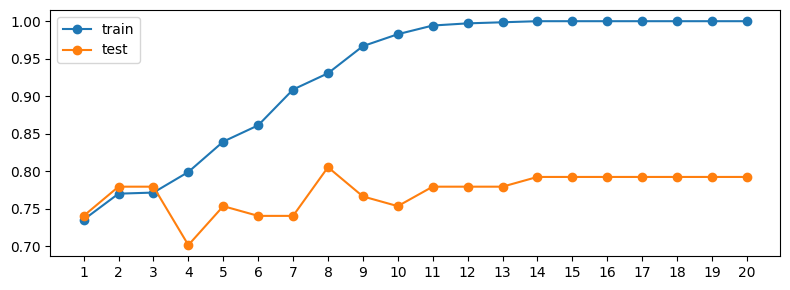

In [31]:
from sklearn.tree import DecisionTreeClassifier

max_depths = list(range(1,21))
training = []
test = []

for i in max_depths:

    model_tree = DecisionTreeClassifier(max_depth = i, random_state = 42)
    model_tree.fit(X_train, y_train)

    y_train_predict = model_tree.predict(X_train)
    y_train_predict_accuracy = accuracy_score(y_train, y_train_predict)
    training.append(y_train_predict_accuracy)

    y_test_predict = model_tree.predict(X_test)
    y_test_predict_accuracy = accuracy_score(y_test, y_test_predict)
    test.append(y_test_predict_accuracy)


plt.figure(figsize = (8,3))

plt.plot(max_depths, training, 'o-', label = 'train')
plt.plot(max_depths, test, 'o-', label = 'test')
plt.xticks(range(1, 21))
plt.legend()
plt.tight_layout()
plt.show()

In [32]:
hyperparams = {
    'max_depth' : list(range(1, 21, 2)),
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'min_samples_split' : list(range(2,20,2)),
    'min_samples_leaf' : list(range(1, 5))
}

In [33]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier(random_state = 42)
grid_search = GridSearchCV(estimator = model, param_grid = hyperparams, scoring = 'accuracy', n_jobs = -1, cv = 10)

In [34]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18]},
             scoring='accuracy')

In [35]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, random_state=42)

In [36]:
y_predic_best = best_model.predict(X_test)

In [37]:
accuracy_score(y_test, y_predic_best)

0.7402597402597403

In [38]:
y_prueba = best_model.predict(X_train)
accuracy_score(y_train, y_prueba)

0.829232995658466

El modelo generaliza mejor.

In [39]:
from pickle import dump

dump(best_model, open("../models/best_model_tree_classifier.sav", "wb"))

In [40]:
X_train["Outcome"] = list(y_train)
X_test["Outcome"] = list(y_test)
X_train.to_csv("../data/processed/diabetes_train.csv", index=False)
X_test.to_csv("../data/processed/diabetes_test.csv", index=False)